## Bill

### Data analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da

d = pd.read_csv(r"C:\Users\billt\OneDrive\Desktop\SML_project\train.csv")
d

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,761,174.0,43.200000,31.000000,46.0,24.0,Male
1035,632,8404,1952.0,187,6,1992,2,5820,172.0,37.166667,24.000000,21.0,34.0,Female
1036,1326,2750,877.0,356,2,2000,3,547,53.0,27.500000,27.666667,28.0,25.0,Male
1037,462,3994,775.0,52,8,1996,3,2757,32.0,42.857143,38.500000,29.0,32.0,Female


In [11]:
d["Number of words co-lead"] = d["Number of words lead"] - d["Difference in words lead and co-lead"]
d = d.drop( ["Difference in words lead and co-lead"], axis="columns")
d

,Number words female,Total words,Number of words lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,Number of words co-lead
0,1512,6394,2251.0,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female,1908.0
1,1524,8780,2020.0,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male,801.0
2,155,4176,942.0,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male,155.0
3,1073,9855,3440.0,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male,817.0
4,1317,7688,3835.0,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male,686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,5,1973,2,761,174.0,43.200000,31.000000,46.0,24.0,Male,168.0
1035,632,8404,1952.0,6,1992,2,5820,172.0,37.166667,24.000000,21.0,34.0,Female,1765.0
1036,1326,2750,877.0,2,2000,3,547,53.0,27.500000,27.666667,28.0,25.0,Male,521.0
1037,462,3994,775.0,8,1996,3,2757,32.0,42.857143,38.500000,29.0,32.0,Female,723.0


In [12]:
d2 = pd.DataFrame()

lead=list()
colead=list()
femrest=list()
malerest=list()


for i in range(1039):
    lead.append(d.iloc[i,2] / d.iloc[i,1])
    colead.append(d.iloc[i,13] / d.iloc[i,1])
    femrest.append( (d.iloc[i,0] / d.iloc[i,1]))
    malerest.append( (d.iloc[i,6] / d.iloc[i,1]))

d2 = pd.DataFrame( {"lead perc":lead, "colead perc":colead, "fem rest perc":femrest, "male rest perc":malerest, "Lead":d["Lead"], "year":d["Year"], "gross":d["Gross"] } )

ml = d2[d2["Lead"]=="Male"]["lead perc"]
fl = d2[d2["Lead"]=="Female"]["lead perc"]

fc = d2[d2["Lead"]=="Male"]["colead perc"]
mc = d2[d2["Lead"]=="Female"]["colead perc"]

splitting = np.cumsum( [0.025 for i in range(40)] )
splitting

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225,
       0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 ,
       0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675,
       0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  ,
       0.925, 0.95 , 0.975, 1.   ])

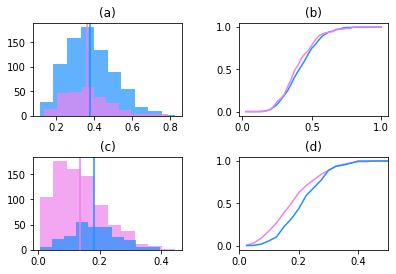

In [13]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)

axs[0,0].hist(ml, color="dodgerblue", alpha=0.7)
axs[0,0].hist(fl, color="violet", alpha=0.7)
axs[0,0].axvline(x=np.mean(ml) , color = 'dodgerblue', label = 'axvline - full height')
axs[0,0].axvline(x=np.mean(fl) , color = 'violet', label = 'axvline - full height')
axs[0,0].title.set_text("(a)")

axs[0,1].plot(splitting, [sum(ml[ml<i])/sum(ml) for i in splitting], color="dodgerblue")
axs[0,1].plot(splitting, [sum(fl[fl<i])/sum(fl) for i in splitting], color="violet")
axs[0,1].title.set_text("(b)")

axs[1,0].hist(fc, color="violet", alpha=0.7)
axs[1,0].hist(mc, color="dodgerblue", alpha=0.7)
axs[1,0].axvline(x=np.mean(mc) , color = 'dodgerblue', label = 'axvline - full height')
axs[1,0].axvline(x=np.mean(fc) , color = 'violet', label = 'axvline - full height')
axs[1,0].title.set_text("(c)")

axs[1,1].plot(splitting, [sum(fc[fc<i])/sum(fc) for i in splitting], color="violet")
axs[1,1].plot(splitting, [sum(mc[mc<i])/sum(mc) for i in splitting], color="dodgerblue")
plt.xlim([0,0.5])
axs[1,1].title.set_text("(d)")

plt.show()

In [15]:
msgr = pd.DataFrame()
male_speaking=list()
year=list()
gr=list()

for i in range(1039):
    if d2.iloc[i,4]=="Male":
        male_speaking.append(d2.iloc[i,0]+d2.iloc[i,3])
        year.append(d2.iloc[i,5])
        gr.append(d2.iloc[i,6])
    else:
        male_speaking.append(d2.iloc[i,3])
        year.append(d2.iloc[i,5])
        gr.append(d2.iloc[i,6])

msgr = pd.DataFrame( {"ms":male_speaking, "gr":gr} )

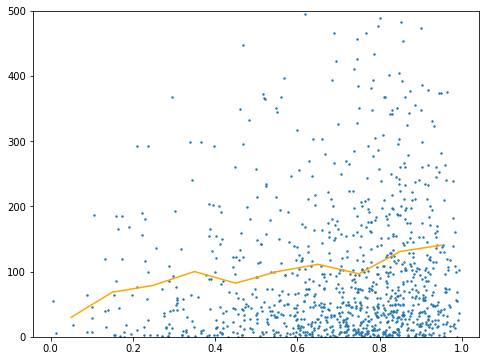

In [16]:
xx = np.cumsum( [0.1]*10 )
yy = []

for i in xx:
    yy.append( np.mean(msgr[ np.logical_and(msgr["ms"]<i, msgr["ms"]> i-0.1) ]["gr"]) )


plt.figure(figsize=(8,6))
plt.scatter(male_speaking, gr, s=2)

plt.plot(xx-0.05, yy, color="orange")

plt.ylim([0,500])
plt.show()